# Решеющие деревья
`Цель` - довести до максимума (information gain) прирост информации при каждом разделении
# Критерии разделения
<img src="https://miro.medium.com/max/1400/1*bVGWGETTor7bSnhr7sXEVw.png" alt="альтернативный текст">
<img src="https://miro.medium.com/max/1400/1*TwnG1LE42PCEgeFatN_c9w.gif" alt="альтернативный текст">

 - p - процент каждого класса, присутствующего в дочернем узле, который является результатом разделения в дереве
 
Если классы распределены равномерно, то энтропия равна 1

In [29]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * p


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return np.min([p, 1 - p])

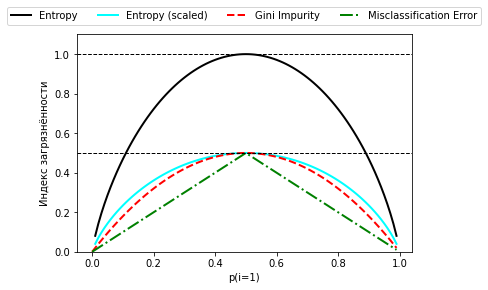

In [30]:
x = np.arange(0.0, 1.0, 0.01)

ent    = [entropy(p) if p else None for p in x]
sc_ent = [e * 0.5    if e else None for e in ent]
err    = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'cyan', 'red', 'green']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Индекс загрязнённости')
plt.show()

# Пример:
<img src="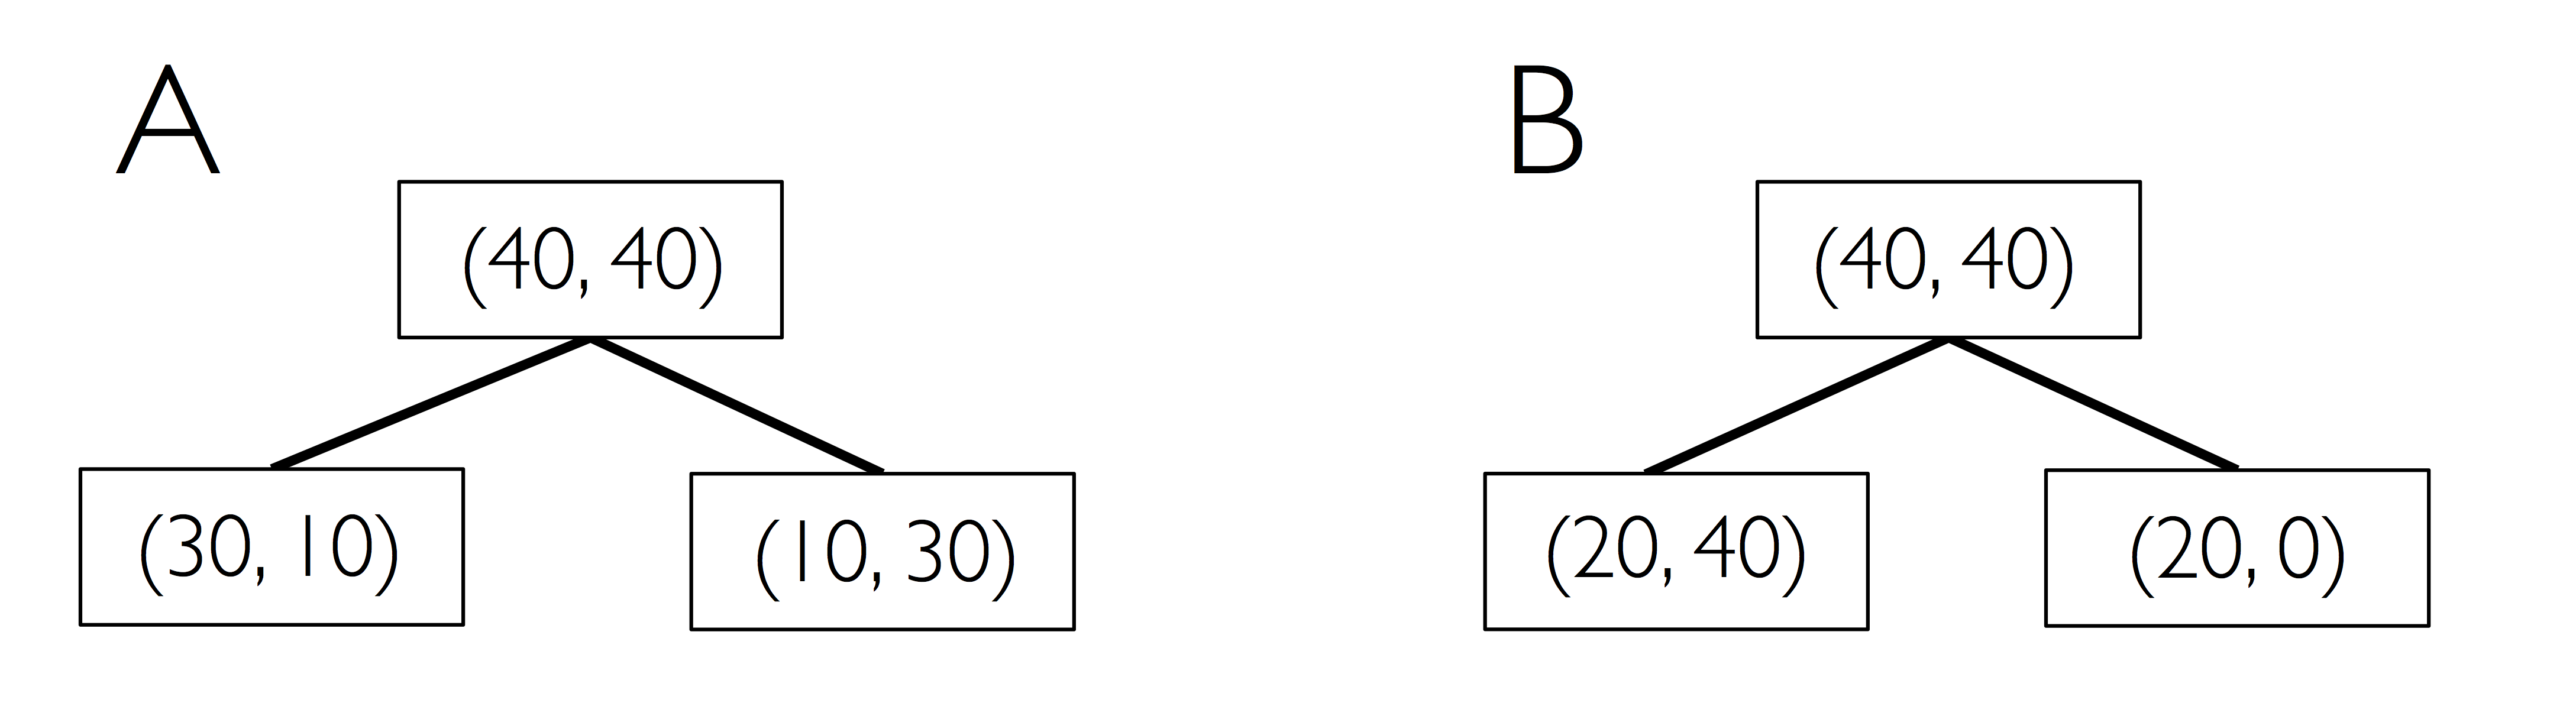%0A" alt="альтернативный текст">


### - Прирост информации с применением `ошибки классификации` в качестве критерия разделения

In [35]:
# Для А
error_p = 0.5
error_l = 1/4
error_r = 1/4
error_p - (4/8)*error_l - (4/8)*error_r

0.25

In [36]:
# Для B
error_p = 0.5
error_l = 2/6
error_r = 0
error_p - (6/8)*error_l - 0

0.25

### - Прирост информации с применением `Загрязнённости Джини` в качестве критерия разделения

In [37]:
# Для А
error_p = 1 - (0.5**2 + 0.5**2)
error_l = 1 - ((3/4)**2 + (1/4)**2)
error_r = 1 - ((1/4)**2 + (3/4)**2)
error_p - (4/8)*error_l - (4/8)*error_r

0.125

In [42]:
# Для B
error_p = 1 - (0.5**2 + 0.5**2)
error_l = 1 - ((2/6)**2 + (4/6)**2)
error_r = 0
error_p - (6/8)*error_l - 0

0.16666666666666669

### - Прирост информации с применением `энтропии` в качестве критерия разделения

In [41]:
# Для А
error_p =  - 0.5*np.log2(0.5) - (0.5)*np.log2(0.5)
error_l =  - (3/4)*np.log2(3/4) - (1/4)*np.log2(1/4)
error_r =  - (1/4)*np.log2(1/4) - (3/4)*np.log2(3/4)
error_p - (4/8)*error_l - (4/8)*error_r

0.1887218755408671

In [43]:
# Для B
error_p =  - 0.5*np.log2(0.5) - (0.5)*np.log2(0.5)
error_l =  - (2/6)*np.log2(2/6) - (4/6)*np.log2(4/6)
error_r = 0
error_p - (6/8)*error_l - 0

0.31127812445913283